In [1]:
import numpy
import sympy
from sympy import init_printing
init_printing()

from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

x, x0, sigma0, p0, h, = sympy.symbols('x x0 sigma0 p0 h', real = True )

# Divido la costruzione della funzione in parti
esponente0   = -((x-x0)**2 / (4 * sigma0**2))
frazione     = sympy.exp(esponente0) / sympy.sqrt(2 * sympy.pi * sigma0)
esponente1   = (p0 * 1j * (x-x0)/ h)
esponenziale = sympy.exp(esponente1)
#funzione finale
psi =  frazione * esponenziale
#print(psi)
#psi

#dichiariamo le variabili pt_1

x0_value     = 10**-1          #posizione iniziale (metri) +
M            = 10**-30         #massa dell'elettrone
vg           = 10**-1          #velocità di gruppo (m/s)
p0_value     = vg * M          #quantità di moto (kg * m/s) +
h_value      = 1.054 * 10**-34 #costante di Planck (J * s) +
sigma0_value = 2 * 10**-2      #dispersione iniziale (m) + 
x_value      = 1               #spazio totale percorso (x= 0 to x=1 m) +

#--------------------------------------------------------------------------funzione d'onda
from sympy.utilities.lambdify import lambdify

#--------------------------------------------------------------------------barriera potenziale
K = (p0_value**2) / (2 * M) #energia cinetica delle particelle
v0 = numpy.array([0 * K, -2 * K, -1 * K, -1/2 * K, 1 * K, 1/2 * K, 2 * K])


In [2]:
import sys
import time as clock

class ProgressBar:
    
    def __init__(self, total_iterations):
        
        self.total_iterations = total_iterations
        self.current_iteration = 0
        self.start_time = clock.time()
        
    def step(self):
        
        self.current_iteration += 1
        self.show_progress()
        if self.current_iteration == self.total_iterations:
            self.end_time = clock.time()
            print(f'\Total time taken: {self.end_time -self.start_time} seconds')
    
    def show_progress(self):
        
        percent_complete = self.current_iteration / self.total_iterations
        num_bars = int(percent_complete * 20)
        sys.stdout.write('\r')
        sys.stdout.write(f"Progress: [{'=' * num_bars}{' ' * (20 - num_bars)}]{int(percent_complete * 100)}%")
        sys.stdout.flush()
    
        

In [3]:
#animation
import matplotlib
from matplotlib import animation
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128

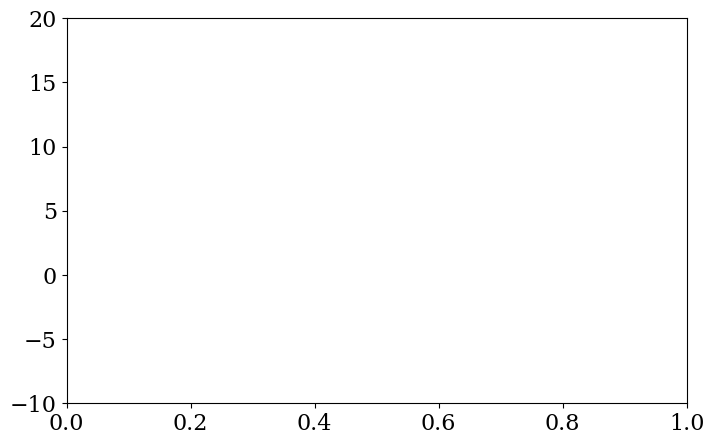

In [4]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,1), ylim=(-10,20)) 
line  = ax.plot([], [], color='r', ls='-', lw=3)[0]
line1 = ax.plot([], [], color='#008000', ls='-', lw=1)[0]
line2 = ax.plot([], [], color='#FFA500', ls='-', lw=0.5)[0]

In [5]:
T  = 8                     #tempo di evoluzione della waveform (s)
dx = 10**-4                #passo spaziale (m)
dt = 0.00009               #passo temporale
nt = int(T / dt)           #numero totale di passi temporali ---> prova 50000!!!800000 
nx = int(x_value / dx) + 1 #numero di punti della griglia

#inizializzazione griglia
x_grid = numpy.linspace(0, x_value, nx)
    
#condizioni iniziali funzione al tempo (t = 0)
psi_lamb = lambdify((x0, x, p0, sigma0, h), psi)
p = numpy.asarray([psi_lamb(x0_value, x, p0_value, sigma0_value, h_value) for x in x_grid])

#barriera potenziale
v = numpy.ones(nx) 
v[numpy.intersect1d(numpy.where(x_grid >= 5.0 * 10**-1), numpy.where(x_grid <= 5.5 * 10**-1))] = v0[2]
    
#lower and upper
v[numpy.where( x_grid < 5.0 * 10**-1 )] = 0
v[numpy.where( x_grid > 5.5 * 10**-1 )] = 0

#initialize vector
un     = numpy.empty(nx)
en     = numpy.empty(nx)
    
real_psi = numpy.real(p)
imag_psi = numpy.imag(p)

In [6]:
#frame_count = 0  # Inizializza la variabile di conteggio dei frame
def wave(n):
    
    #global frame_count  # Dichiara che stai utilizzando la variabile globale frame_count  
    pb = ProgressBar(1111)
    for n in range(1111):
        #parte immaginaria
        en = imag_psi.copy()
        real_psi[1:-1] +=  - (h_value/(2 * M))*dt/dx**2*(en[2:] - 2*en[1:-1] + en[0:-2]) \
                           + (dt/h_value) * v[1:-1] * en[1:-1]
        #At the boundary
        real_psi[0]    = 0
        real_psi[-1]   = 0
    
        #parte reale
        un = real_psi.copy()   
        imag_psi[1:-1] +=   (h_value/(2 * M))*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) \
                          - (dt / h_value) * v[1:-1] * un[1:-1]
        #At the boundary    
        imag_psi[0]    = 0
        imag_psi[-1]   = 0
        pb.step()
    
    p = real_psi + 1j * imag_psi
    line.set_data(x_grid, abs(p)**2)
    line1.set_data(x_grid, real_psi)
    line2.set_data(x_grid, imag_psi)
    

In [7]:
anim = animation.FuncAnimation(fig, wave,
                               frames=80, interval=100)

In [8]:
HTML(anim.to_jshtml())

Progress: [====================]100%\Total time taken: 2.1663177013397217 seconds
Progress: [====================]100%\Total time taken: 1.890995979309082 seconds
Progress: [====================]100%\Total time taken: 1.7998087406158447 seconds
Progress: [====================]100%\Total time taken: 1.8312726020812988 seconds
Progress: [====================]100%\Total time taken: 1.7304050922393799 seconds
Progress: [====================]100%\Total time taken: 1.7754855155944824 seconds
Progress: [====================]100%\Total time taken: 1.9420006275177002 seconds
Progress: [====================]100%\Total time taken: 1.9271459579467773 seconds
Progress: [====================]100%\Total time taken: 1.954099416732788 seconds
Progress: [====================]100%\Total time taken: 1.7590773105621338 seconds
Progress: [====================]100%\Total time taken: 2.0357916355133057 seconds
Progress: [====================]100%\Total time taken: 2.5590014457702637 seconds
Progress: [=======